In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
now_phase = 3

train_path = 'C:/study/KDDCUP/underexpose_train'  
test_path = 'C:/study/KDDCUP/underexpose_test'  
whole_click = pd.DataFrame()  
whole_test_click = pd.DataFrame()  
bin_num=300
time_bin=np.linspace(0.98375, 0.98420, num=bin_num+1)
#bin_res = np.zeros((5,bin_num), dtype = np.float) 
for c in range(now_phase + 1):  
    print('phase:', c)  
    click_train = pd.read_csv(train_path + '/underexpose_train_click-{}.csv'.format(c), header=None,  names=['user_id', 'item_id', 'time'])  
    click_test = pd.read_csv(test_path + '/underexpose_test_click-{}.csv'.format(c,c), header=None,  names=['user_id', 'item_id', 'time'])  

    all_click = click_train.append(click_test)  
    whole_click = whole_click.append(all_click)  
    whole_click=whole_click.drop_duplicates(keep='first',inplace=False)
    print(len(whole_click))
    

import os,gc,re,warnings,sys
warnings.filterwarnings("ignore")

path = 'C:/study/KDDCUP/'

##### train
train_user_df = pd.read_csv(path+'underexpose_train/underexpose_user_feat.csv', names=['user_id','user_age_level','user_gender','user_city_level'])
train_item_df = pd.read_csv(path+'underexpose_train/underexpose_item_feat.csv')
train_click_0_df = pd.read_csv(path+'underexpose_train/underexpose_train_click-0.csv',names=['user_id','item_id','time'])
test_click_0_df = pd.read_csv(path+'underexpose_test/underexpose_test_click-0.csv',names=['user_id','item_id','time'])

##### test
test_qtime_0_df = pd.read_csv(path+'underexpose_test/underexpose_test_click-0/underexpose_test_qtime-0.csv', names=['user_id','query_time'])
test_click_0_df = pd.read_csv(path+'underexpose_test/underexpose_test_click-0/underexpose_test_click-0.csv', names=['user_id','item_id','time'])

phase: 0
263000
phase: 1
368885
phase: 2
477251
phase: 3
602047


In [10]:
def plot_time_analysis(df,height=9000):
    bin_num=300
    time_bin=np.linspace(0.98370, 0.98420, num=bin_num+1)
    bin_res = np.zeros((5,bin_num), dtype = np.float) 
    for i in range(0,bin_num):
        time_start=time_bin[i]
        time_end=time_bin[i+1]
        tmp=df[df['time']>=time_start]
        tmp=tmp[tmp['time']<time_end]
        bin_res[0][i]=len(tmp)

    plt.figure(figsize=(20,5))
    plt.ylim(0,height)
    plt.plot(time_bin[0:bin_num], bin_res[0], 'red',label = 'phase'+ str(3) + '条线段')
    plt.show()


In [23]:
user_havefea_id=train_user_df[train_user_df['user_gender']=='F']['user_id']
user_havefea_id
this_click=pd.merge(user_havefea_id,whole_click,on='user_id')
this_click

,user_id,item_id,time
0,35,39593,0.983754
1,35,39810,0.983796
2,35,67161,0.983908
3,35,88501,0.983745
4,35,6164,0.983912
...,...,...,...
138674,35340,20891,0.984000
138675,35340,11657,0.983941
138676,35340,7187,0.983938
138677,35340,28936,0.983989


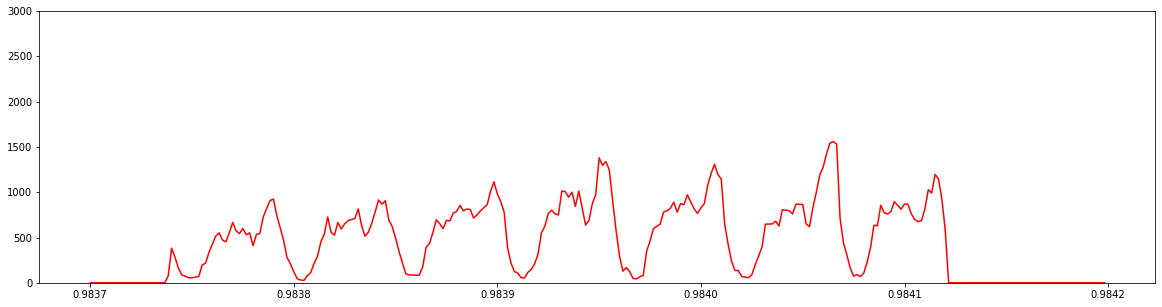

In [25]:
this_click=this_click.drop_duplicates(keep='first',inplace=False)
plot_time_analysis(this_click,height=3000)

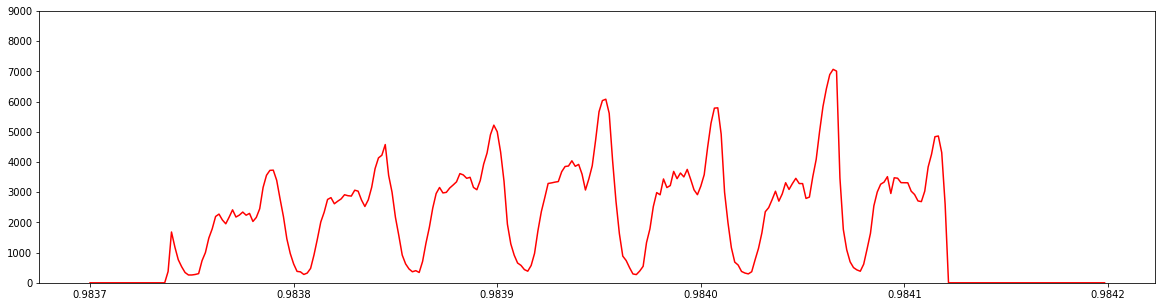

In [13]:
plot_time_analysis(whole_click)

In [41]:
whole_click[whole_click['item_id']==4]

,user_id,item_id,time
36965,29720,4,0.983982
146557,34045,4,0.983935
234697,8248,4,0.983975
234698,6181,4,0.983836


In [82]:
temp=whole_click.groupby('item_id').count().reset_index()
temp
temp_sort=temp.sort_values(by='user_id', ascending=False).reset_index()
#temp#=temp_sort['item_id','time']
print(temp_sort)
a=temp_sort['item_id']
#temp['item_id']
#temp.columns=['item_id','count']  

       index  item_id  user_id  time
0      33499    52766      528   528
1      69431   111225      328   328
2       2821     4340      308   308
3      13707    21426      307   307
4      13622    21279      283   283
...      ...      ...      ...   ...
71899  47021    74626        2     2
71900  40276    63860        1     1
71901  42414    67309        1     1
71902  50299    79881        1     1
71903  46604    73948        1     1

[71904 rows x 4 columns]


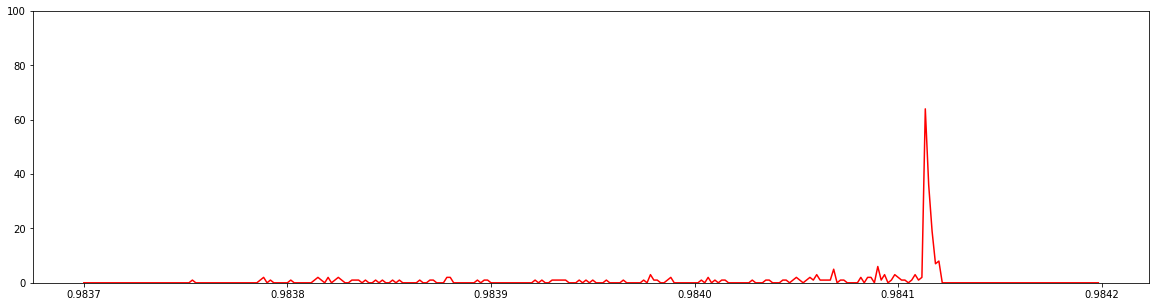

In [99]:
plot_click=whole_click[whole_click['item_id']==a[9]]
plot_time_analysis(plot_click,height=100)

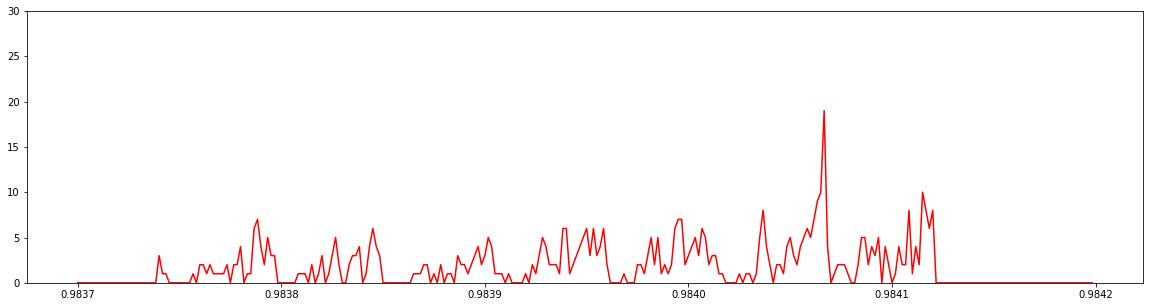

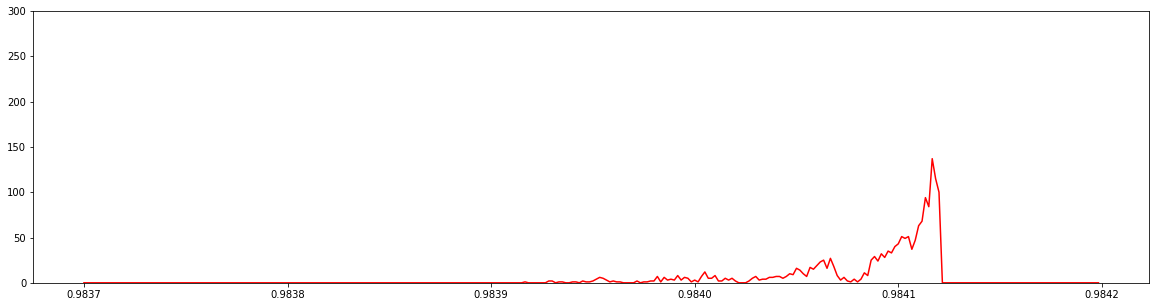

In [111]:
test_qtime_0_df = pd.read_csv(path+'underexpose_test/underexpose_test_click-3/underexpose_test_qtime-3.csv', names=['user_id','query_time'])
test_qtime_0_df.columns=['user_id','time']  
plot_time_analysis(test_qtime_0_df,height=300)

In [112]:
test_qtime_0_df

,user_id,time
0,3,0.984117
1,25,0.984093
2,36,0.984114
3,47,0.984121
4,80,0.984107
...,...,...
1670,35313,0.983985
1671,35335,0.984108
1672,35357,0.984019
1673,35379,0.984100


In [117]:
test_qtime_0_df[test_qtime_0_df['user_id']==3]['time']

0    0.984117
Name: time, dtype: float64

In [120]:
temp_whole_click=whole_click[whole_click['time']>=0.984121]

In [118]:
whole_click

,user_id,item_id,time
0,4965,18,0.983763
1,20192,34,0.983772
2,30128,91,0.983780
3,29473,189,0.983930
4,10625,225,0.983925
...,...,...,...
24007,5327,115266,0.983954
24008,5591,115323,0.984094
24017,23433,116550,0.984105
24019,12565,117502,0.984052


In [121]:
temp_whole_click

,user_id,item_id,time
24,4000,380,0.984121
319,21756,3826,0.984121
1049,10182,12845,0.984121
1390,16197,17862,0.984121
1641,13711,21918,0.984121
...,...,...,...
13747,6449,111318,0.984121
18565,33553,62357,0.984121
20249,26832,105357,0.984121
21515,28801,73431,0.984121
